In [1]:
from keras.datasets import mnist

(x_train,y_train),(x_test,y_test) = mnist.load_data()

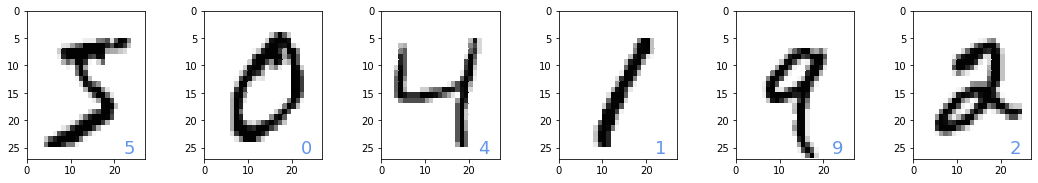

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1,figsize=(18,6))
plt.subplots_adjust(wspace=0.5)
plt.gray()

for id in range(6):
    plt.subplot(2,6,id + 1)
    img = x_train[id,:,:]
    plt.pcolor(255-img)
    plt.text(22,26,"%d"% y_train[id],color='cornflowerblue',fontsize=18)
    plt.xlim(0,27)
    plt.ylim(27,0)

plt.show()

In [3]:
from keras.utils import np_utils

x_train = x_train.reshape(60000, 784)  # (A)
x_train = x_train.astype('float32')   # (B)
x_train = x_train / 255               # (C)
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)  # (D)

x_test = x_test.reshape(10000, 784)
x_test = x_test.astype('float32')
x_test = x_test / 255
y_test = np_utils.to_categorical(y_test, num_classes)


np.random.seed(1)                                         # (A)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

model = Sequential()                                      # (B)
model.add(Dense(16, input_dim=784, activation='sigmoid')) # (C)
model.add(Dense(10, activation='softmax'))                # (D)
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(), metrics=['accuracy'])     # (E)

import time

startTime = time.time()
history = model.fit(x_train, y_train, epochs=10, batch_size=1000,
                    verbose=1, validation_data=(x_test, y_test))  # (A)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))


Epoch 1/10
60/60 [==============================] - 0s 6ms/step - loss: 2.0783 - accuracy: 0.3244 - val_loss: 1.7954 - val_accuracy: 0.5055
Epoch 2/10
60/60 [==============================] - 0s 3ms/step - loss: 1.6168 - accuracy: 0.6140 - val_loss: 1.4335 - val_accuracy: 0.7164
Epoch 3/10
60/60 [==============================] - 0s 3ms/step - loss: 1.3128 - accuracy: 0.7530 - val_loss: 1.1803 - val_accuracy: 0.7910
Epoch 4/10
60/60 [==============================] - 0s 3ms/step - loss: 1.0944 - accuracy: 0.8074 - val_loss: 0.9936 - val_accuracy: 0.8362
Epoch 5/10
60/60 [==============================] - 0s 3ms/step - loss: 0.9319 - accuracy: 0.8380 - val_loss: 0.8530 - val_accuracy: 0.8604
Epoch 6/10
60/60 [==============================] - 0s 3ms/step - loss: 0.8078 - accuracy: 0.8576 - val_loss: 0.7442 - val_accuracy: 0.8743
Epoch 7/10
60/60 [==============================] - 0s 3ms/step - loss: 0.7115 - accuracy: 0.8708 - val_loss: 0.6601 - val_accuracy: 0.8813
Epoch 8/10
60/60 [==

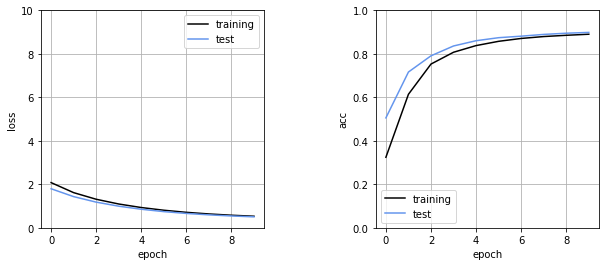

In [4]:
plt.figure(1,figsize=(10,4))
plt.subplots_adjust(wspace=0.5)

plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='training',color='black')
plt.plot(history.history['val_loss'],label='test',color='cornflowerblue')
plt.ylim(0,10)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label='training',color='black')
plt.plot(history.history['val_accuracy'],label='test',color='cornflowerblue')
plt.ylim(0,1)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()
    

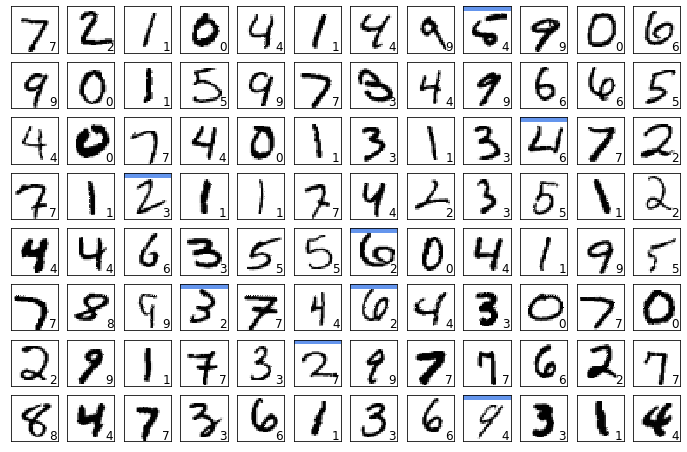

In [5]:
def show_prediction():
    n_show = 96
    y = model.predict(x_test)
    plt.figure(2,figsize=(12,8))
    plt.gray()
    
    for i in range(n_show):
        plt.subplot(8,12,i+1)
        x = x_test[i,:]
        x = x.reshape(28,28)
        plt.pcolor(1-x)
        wk = y[i,:]
        prediction = np.argmax(wk)
        plt.text(22,25.5,"%d"% prediction,fontsize=12)
        
        if prediction != np.argmax(y_test[i,:]):
            plt.plot([0,27],[1,1],color='cornflowerblue',linewidth=5)
        
        plt.xlim(0,27)
        plt.ylim(27,0)
        plt.xticks([],"")
        plt.yticks([],"")

# main
show_prediction()
plt.show()
